=== STEP 1: Library loaded ===
=== STEP 2: Data loaded ===
Shape: (307511, 122)

=== TARGET DISTRIBUTION ===
TARGET
0    0.919271
1    0.080729
Name: proportion, dtype: float64

=== STEP 3: Feature selection ===
Total numeric features: 105
=== STEP 4: Missing value handled ===
=== STEP 5: Train-test split ===
Train: (246008, 105) Test: (61503, 105)
=== STEP 6: Scaling completed ===

=== MODEL 1: LOGISTIC REGRESSION ===
Accuracy: 0.9192397118839731
ROC AUC: 0.736005143649966

=== MODEL 2: RANDOM FOREST ===
Accuracy: 0.9192722306228964
ROC AUC: 0.7323317344300906


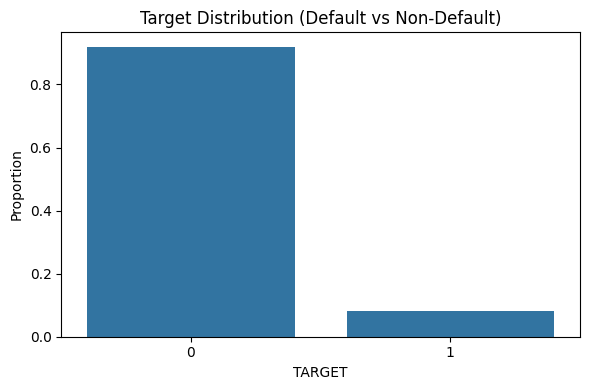

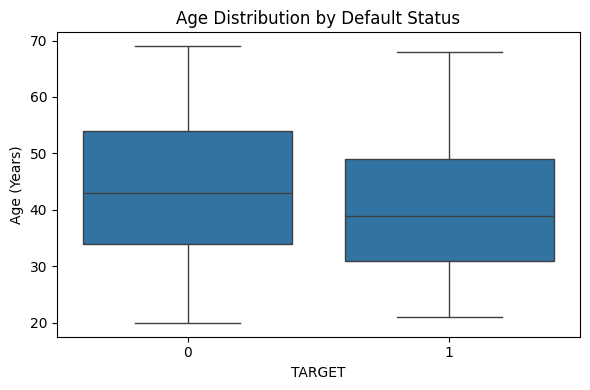

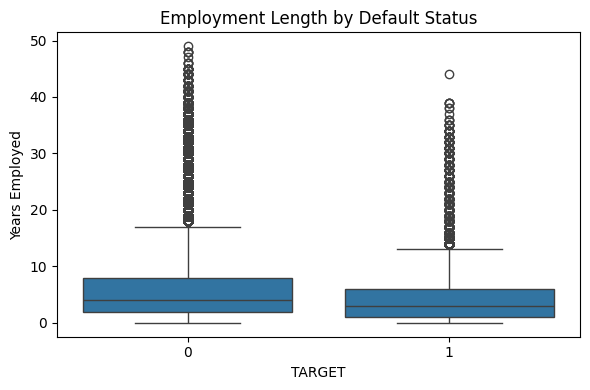

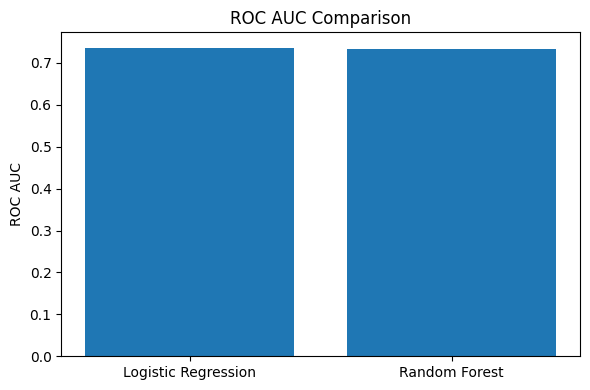

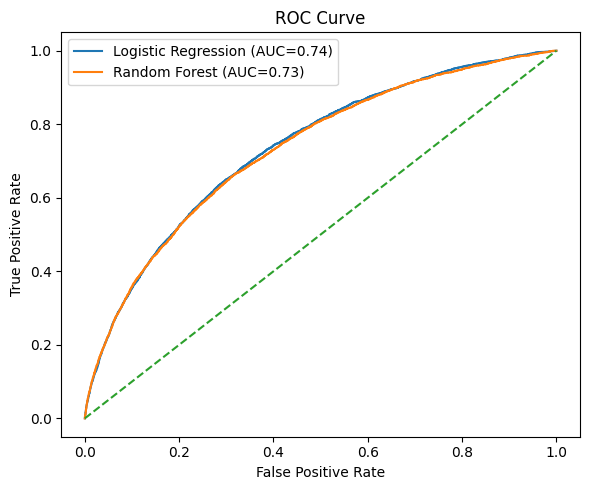


=== TOP 10 IMPORTANT FEATURES ===
EXT_SOURCE_2              0.187555
EXT_SOURCE_3              0.172156
EXT_SOURCE_1              0.065295
DAYS_BIRTH                0.039960
DAYS_EMPLOYED             0.033830
AMT_GOODS_PRICE           0.025131
DAYS_LAST_PHONE_CHANGE    0.023157
DAYS_ID_PUBLISH           0.023046
AMT_CREDIT                0.020551
AMT_ANNUITY               0.018919
dtype: float64


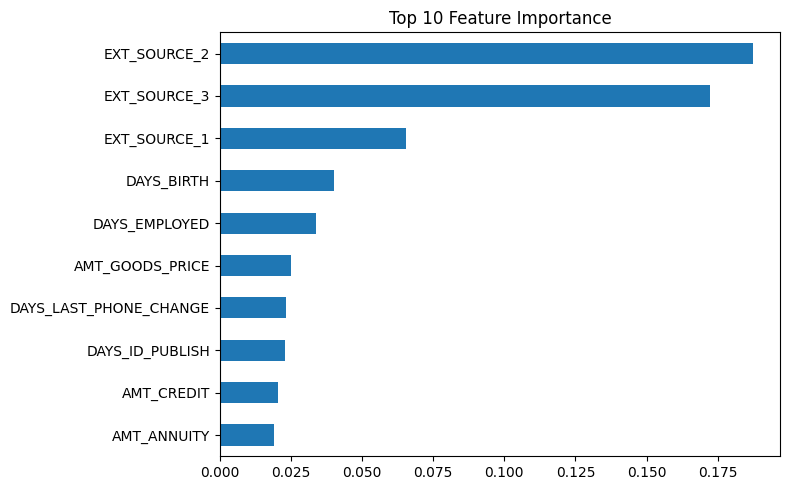


=== PIPELINE FINISHED SUCCESSFULLY ===


In [5]:
# ===============================
# HOME CREDIT RISK ANALYSIS
# Data Science
# ===============================

# 1. IMPORT LIBRARY
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

import warnings
warnings.filterwarnings('ignore')

print("=== STEP 1: Library loaded ===")


# 2. LOAD DATA
df = pd.read_csv('../data/application_train.csv')
print("=== STEP 2: Data loaded ===")
print("Shape:", df.shape)


# 3. TARGET CHECK
print("\n=== TARGET DISTRIBUTION ===")
target_dist = df['TARGET'].value_counts(normalize=True)
print(target_dist)


# 4. SELECT NUMERIC FEATURES
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
num_cols = num_cols.drop('TARGET')

X = df[num_cols]
y = df['TARGET']

print("\n=== STEP 3: Feature selection ===")
print("Total numeric features:", X.shape[1])


# 5. HANDLE MISSING VALUE
X = X.fillna(X.median())
print("=== STEP 4: Missing value handled ===")


# 6. TRAIN TEST SPLIT
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("=== STEP 5: Train-test split ===")
print("Train:", X_train.shape, "Test:", X_test.shape)


# 7. SCALING
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("=== STEP 6: Scaling completed ===")


# 8. MODEL 1 — LOGISTIC REGRESSION
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, y_train)

y_pred_lr = logreg.predict(X_test_scaled)
y_prob_lr = logreg.predict_proba(X_test_scaled)[:, 1]

acc_lr = accuracy_score(y_test, y_pred_lr)
roc_lr = roc_auc_score(y_test, y_prob_lr)

print("\n=== MODEL 1: LOGISTIC REGRESSION ===")
print("Accuracy:", acc_lr)
print("ROC AUC:", roc_lr)


# 9. MODEL 2 — RANDOM FOREST
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

acc_rf = accuracy_score(y_test, y_pred_rf)
roc_rf = roc_auc_score(y_test, y_prob_rf)

print("\n=== MODEL 2: RANDOM FOREST ===")
print("Accuracy:", acc_rf)
print("ROC AUC:", roc_rf)


# ===============================
# 10. VISUALIZATION SECTION
# ===============================

# A. Target Distribution
plt.figure(figsize=(6,4))
sns.barplot(x=target_dist.index, y=target_dist.values)
plt.title('Target Distribution (Default vs Non-Default)')
plt.xlabel('TARGET')
plt.ylabel('Proportion')
plt.tight_layout()
plt.show()


# B. Age vs Default
df['AGE_YEARS'] = (-df['DAYS_BIRTH'] / 365).astype(int)

plt.figure(figsize=(6,4))
sns.boxplot(x='TARGET', y='AGE_YEARS', data=df)
plt.title('Age Distribution by Default Status')
plt.xlabel('TARGET')
plt.ylabel('Age (Years)')
plt.tight_layout()
plt.show()


# C. Employment Length vs Default
df_emp = df[df['DAYS_EMPLOYED'] < 0].copy()
df_emp['EMPLOYED_YEARS'] = (-df_emp['DAYS_EMPLOYED'] / 365).astype(int)

plt.figure(figsize=(6,4))
sns.boxplot(x='TARGET', y='EMPLOYED_YEARS', data=df_emp)
plt.title('Employment Length by Default Status')
plt.xlabel('TARGET')
plt.ylabel('Years Employed')
plt.tight_layout()
plt.show()


# D. Model Performance Comparison
models = ['Logistic Regression', 'Random Forest']
accuracy = [acc_lr, acc_rf]
roc_auc = [roc_lr, roc_rf]

plt.figure(figsize=(6,4))
plt.bar(models, roc_auc)
plt.title('ROC AUC Comparison')
plt.ylabel('ROC AUC')
plt.tight_layout()
plt.show()


# E. ROC Curve
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)

plt.figure(figsize=(6,5))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC={roc_lr:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC={roc_rf:.2f})')
plt.plot([0,1], [0,1], '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.tight_layout()
plt.show()


# F. Feature Importance
feat_importance = pd.Series(
    rf.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

print("\n=== TOP 10 IMPORTANT FEATURES ===")
print(feat_importance.head(10))

plt.figure(figsize=(8,5))
feat_importance.head(10).plot(kind='barh')
plt.title('Top 10 Feature Importance')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


print("\n=== PIPELINE FINISHED SUCCESSFULLY ===")


In [6]:
import sys
!{sys.executable} -m pip install seaborn



[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip
